<a href="https://colab.research.google.com/github/BL-Labs/Jupyter-notebooks-projects-using-BL-Sources/blob/master/LOD_SPARQL/00_BNB_SPARQL_books_by_LCSH_subject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BNB -- SPARQL query - Books by Subject

The [BNB Linked Data Platform](https://bnb.data.bl.uk/) provides access to the [British National Bibliography (BNB)](http://www.bl.uk/bibliographic/natbib.html) published as linked open data and made available through SPARQL services. 

This notebook explains how to query it to retrieve records of books (have a ISBN) indexed under a given Subject / Topic (LCSH).

*Inspired by:*

https://github.com/hibernator11/notebook-lod-libraries 
by Gustavo Candela (https://github.com/hibernator11), Research and Development department at The Biblioteca Virtual Miguel de Cervantes, University of Alicante, Spain

## Global configuration

Set the Subject to search from [LCSH list](http://id.loc.gov/authorities/subjects.html):

In [0]:
# Subject = 'Nanotubes'

# Other examples:

# Climatic Changes
Subject = 'Climaticchanges'

# Global Warming
# Subject = 'Globalwarming'


#### Required modules / libraries

In [0]:
import requests
import pandas as pd
import json
import csv
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

## Let's query the repository by asking the publications indexed by the defined Subject
We will use the [SPARQL endpoint](https://bnb.data.bl.uk/flint-sparql) to create the query and configure the request to retrieve json as a result.

In [3]:
url = 'https://bnb.data.bl.uk/sparql'
query = """
PREFIX bibo: <http://purl.org/ontology/bibo/> 
PREFIX dct: <http://purl.org/dc/terms/> 
PREFIX schema: <http://schema.org/> 

SELECT ?book ?isbn ?title ?date ?author WHERE {{
      ?book dct:subject <http://bnb.data.bl.uk/id/concept/lcsh/{0}>; 
      bibo:isbn13 ?isbn ; 
      dct:title ?title ; 
      schema:author ?author ; 
      schema:datePublished ?date . 
}}
"""

query = query.format(Subject)

# use json as a result
headers = {'Accept': 'application/sparql-results+json'}
r = requests.get(url, params = {'format': 'application/sparql-results+json', 'query': query}, headers=headers)
print('Elements retrieved!')


Elements retrieved!


In [0]:
# print(r.text)

## Save as a CSV 

In [5]:
bnbdata = json.loads(r.text)

# we need to delete bnb_records.csv case it exists from previous runs 
# if it doesn't exist yet, it will give an error "rm: cannot remove 'bnb_records.csv': No such file or directory", that's just fine! :)
!rm ret_records.csv

with open('ret_records.csv', 'w', newline='') as file:
    csv_out = csv.writer(file, delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)    

    #csv_out = csv.writer(open('bnb_records.csv', 'w'), delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)
    csv_out.writerow(['book', 'isbn', 'title', 'date', 'author'])

    for i in bnbdata['results']['bindings']:
        book = isbn = title = date =''

        book = i['book']['value']
        #if "place" in i:
        isbn = i['isbn']['value']
        title = i['title']['value']
        date = i['date']['value']
        author = i['author']['value']

        csv_out.writerow([book,isbn,title,date,author])

print('Open the generated CSV to see all its contents -- Google Colab: under "Files" > click "ret_records.csv" -- we will also explore it bellow.')

rm: cannot remove 'ret_records.csv': No such file or directory
Open the generated CSV to see all its contents -- Google Colab: under "Files" > click "ret_records.csv" -- we will also explore it bellow.


## Exploring the data

In [6]:
# Load the CSV file from GitHub.
# This puts the data in a Pandas DataFrame
df = pd.read_csv('ret_records.csv')
df.head(5)

,book,isbn,title,date,author
0,http://bnb.data.bl.uk/id/resource/019483741,9781474452175,Dwelling in the age of climate change : the et...,2019-08,http://bnb.data.bl.uk/id/person/KellyElaine
1,http://bnb.data.bl.uk/id/resource/019654542,9780374280000,We are the weather : saving the planet begins ...,2019-09,http://bnb.data.bl.uk/id/person/FoerJonathanSa...
2,http://bnb.data.bl.uk/id/resource/017547068,9781118736005,"Grapevine : climate and environmental stress, ...",2015-11,http://bnb.data.bl.uk/id/person/GerosHernani
3,http://bnb.data.bl.uk/id/resource/017612384,9781118736005,"Grapevine : climate and environmental stress, ...",2015-10,http://bnb.data.bl.uk/id/person/GerosHernani
4,http://bnb.data.bl.uk/id/resource/017612384,9781118736012,"Grapevine : climate and environmental stress, ...",2015-10,http://bnb.data.bl.uk/id/person/GerosHernani


## How many items?

In [7]:
# How many items?
len(df)

877

### Let's count the number of Books by author

In [8]:
books_by_author = df.groupby("author")["book"].count()
books_by_author

author
http://bnb.data.bl.uk/id/organization/SustainableDevelopmentInternational          1
http://bnb.data.bl.uk/id/organization/UnitedNationsEnvironmentProgramme            1
http://bnb.data.bl.uk/id/person/AbbasiSA%28ShahidA%29                              1
http://bnb.data.bl.uk/id/person/AbbottDina                                         2
http://bnb.data.bl.uk/id/person/AbeyratneRIR%28RuwantissaIndranathRamya%291951-    1
                                                                                  ..
http://bnb.data.bl.uk/id/person/ZachariadisTheodorosI                              2
http://bnb.data.bl.uk/id/person/ZhangZhihua1979-                                   2
http://bnb.data.bl.uk/id/person/ZhaoDaiqing                                        1
http://bnb.data.bl.uk/id/person/ZiajaWies%C5%82aw                                  2
http://bnb.data.bl.uk/id/person/ZiskaLewisH                                        1
Name: book, Length: 481, dtype: int64

### Create a chart to visualize the results
This chart shows the number of books by date of publication.

In [9]:
books_by_date = df['date'].value_counts()
books_by_date

2016       108
2015        97
2018        78
2010        46
2017        45
          ... 
2001         1
2018-01      1
1999         1
2019-04      1
2015-02      1
Name: date, Length: 73, dtype: int64

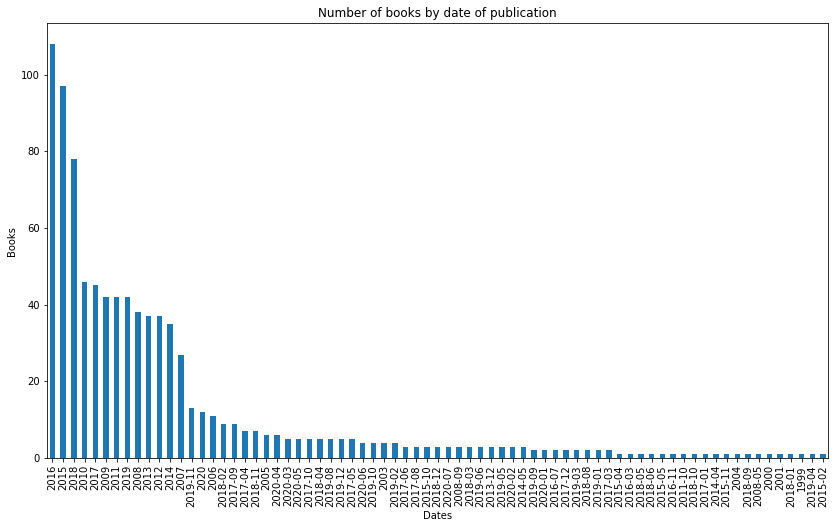

In [10]:
ax = books_by_date.plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of books by date of publication")
ax.set_xlabel("Dates")
ax.set_ylabel("Books")
plt.show()

### Let's group the books by year

In [11]:
# First we create a new column in pandas with the year
df['year'] = pd.DatetimeIndex(df['date']).year
df['year'].head(5)

0    2019
1    2019
2    2015
3    2015
4    2015
Name: year, dtype: int64

### Creating the chart of books by year

In [12]:
# .sort_index() is very important = sorts by year, instead of the the regular count number

books_by_year = df['year'].value_counts().sort_index()
books_by_year

1999      1
2000      1
2001      1
2003      4
2004      1
2005      6
2006     11
2007     27
2008     42
2009     42
2010     46
2011     43
2012     37
2013     40
2014     39
2015    104
2016    112
2017     82
2018    112
2019     86
2020     40
Name: year, dtype: int64

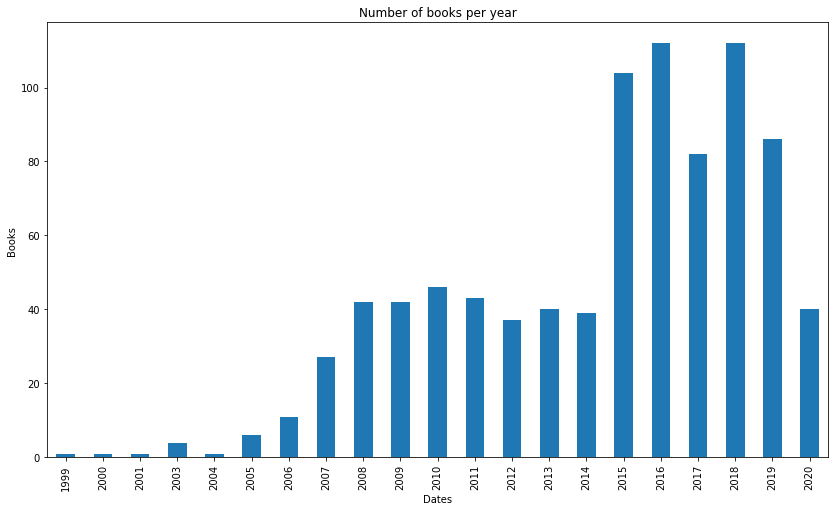

In [13]:
ax = books_by_year.plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of books per year")
ax.set_xlabel("Year")
ax.set_ylabel("Books")
plt.show()

### Creating a Word Cloud of terms in the different titles

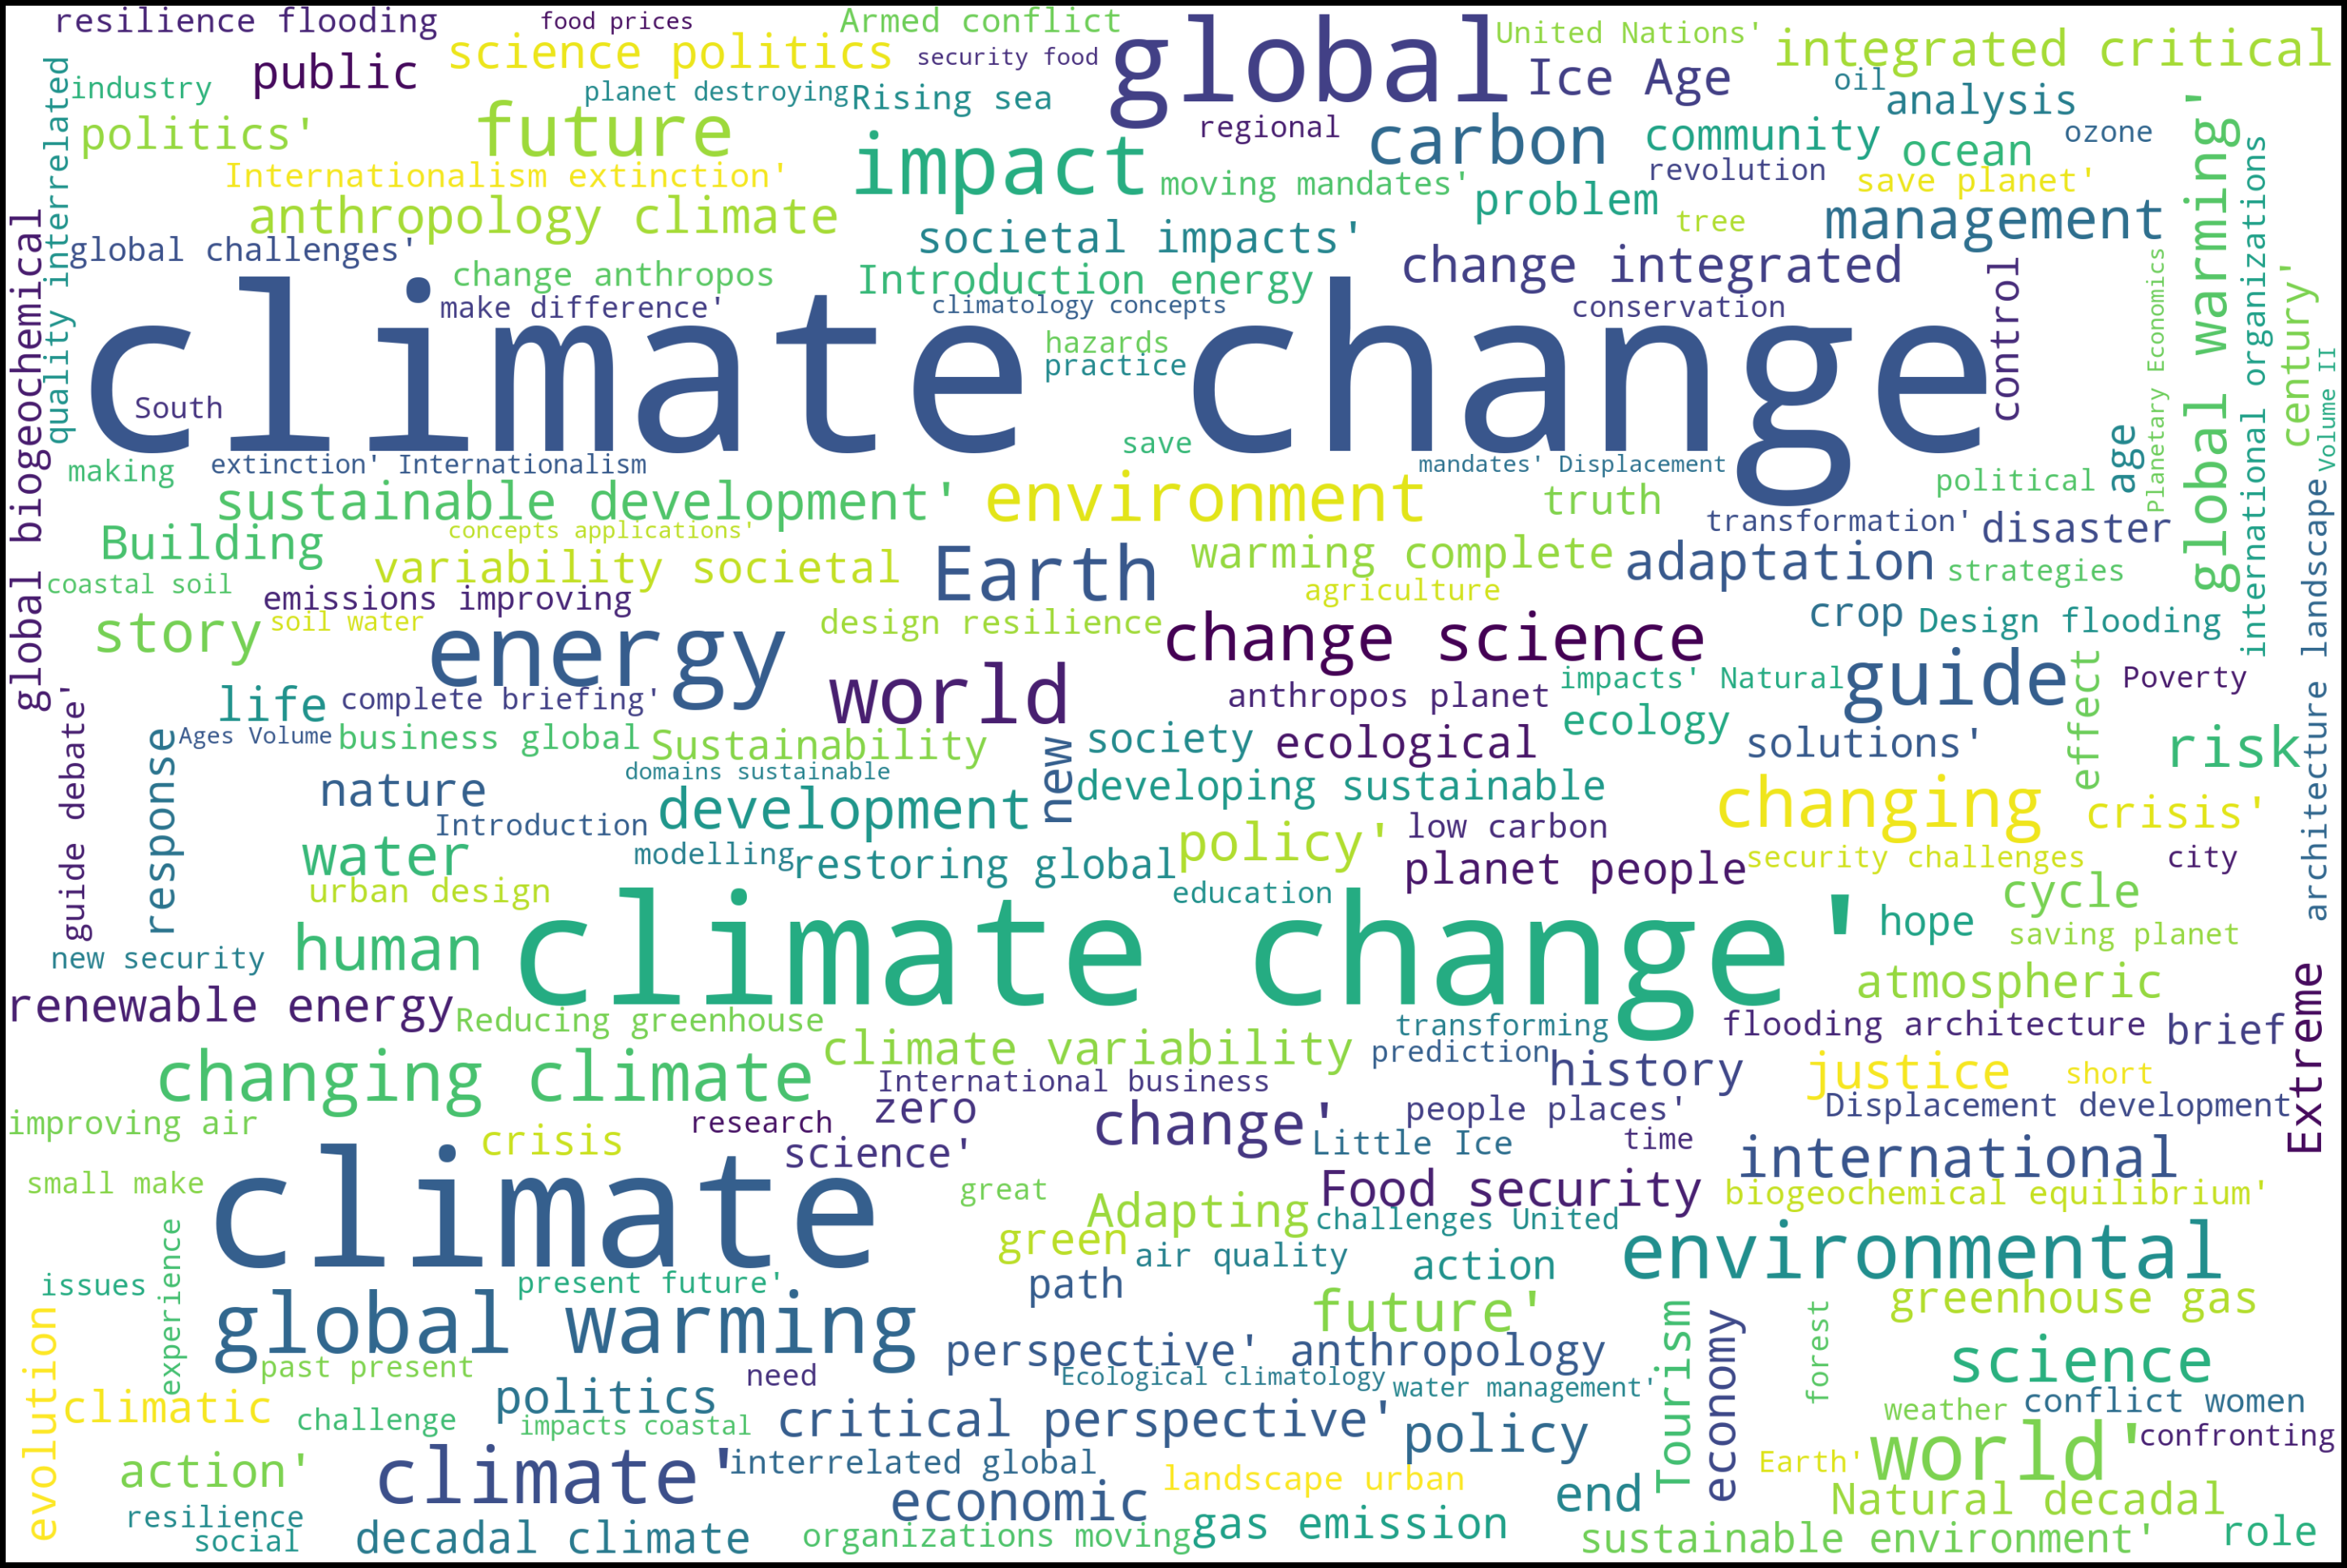

In [14]:
#from wordcloud import WordCloud, STOPWORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Words appearing in the books titles: build the list of documents

list_of_documents=[]
 
for i in range (df["title"].size):
    list_of_documents.append(str(df["title"][i])) 


STOP_WORDS = frozenset([
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "said","you", "your", "yours", "yourself",
    "yourselves", "etc"])


wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOP_WORDS).generate(str(list_of_documents))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()